<img src="http://www.redttu.edu.co/es/wp-content/uploads/2016/01/itm.png" alt="drawing" width="400"/>

<hr>

Pedro Atencio - 2019

__Agenda__:

- Numpy
    - Inicializacion de arreglos y acceso.
        - Shape.
        - Zeros, Ones, linspace, arange.
    - Slicing.
    - Funciones básicas y axis.
        - sum, mean, std, linalg.norm, random.
        - hsplit, vsplit.
        - python math vs numpy.
            - Ejemplo: funcion sigmoide.
    - Funciones de la clase nd-array (built-in) vs funciones de numpy.
    - Vectorization / Broadcasting
        - sumatorias y multiplicación de vectores.
        - Ejemplo: distancia euclidea.
        
- IO en Archivos
    - Python File
    - Pickle

 <hr>
 # 1. Inicializacion de arreglos y acceso.

In [1]:
import numpy
import numpy as np

In [3]:
#A = np.array([[1],[2],[3]]) #creamos un arreglo manualmente.
A = np.array([[1,2,3]])
print("Tamanio del arreglo: ",A.shape) #imprimimos su tamanio
print("Tipo de dato (clase) del arreglo: ", type(A))
print("Num fils: ", A.shape[0])
print("Num cols: ", A.shape[1])

('Tamanio del arreglo: ', (1, 3))
('Tipo de dato (clase) del arreglo: ', <type 'numpy.ndarray'>)
('Num fils: ', 1)
('Num cols: ', 3)


<a href="https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html">Consultar Numpy nd-array.</a>

In [5]:
#A = np.zeros([3,3]) #creamos un arreglo lleno de ceros o unos de tamanio 3x4
A = np.ones([3,3])
print("Arreglo: ", A)
print("Size: ", A.shape)

('Arreglo: ', array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]))
('Size: ', (3, 3))


<hr>
Una forma útil de generar arreglos consiste en la utilización de las funciones __arange__ y __linspace__, las cuales permiten generar arreglos secuenciales en un rango de valores.

- __arange__: Permite crear arreglos de secuencias numéricas, indicando: _<inicio, fin, paso>_.
- __linspace__: Permite crear arreglos de secuencias numéricas, indicando: _<inicio, fin, número de muestras>_.

In [9]:
A = np.arange(-10, 10.01, 0.5)

In [10]:
print("Arreglo: ", A)
print("Forma: ", A.shape)

('Arreglo: ', array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ]))
('Forma: ', (41,))


In [11]:
A = np.linspace(-10,10,20)
print("Arreglo: ", A)
print("Forma: ", A.shape)

('Arreglo: ', array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ]))
('Forma: ', (20,))


<hr>

Generar arreglos de valores aleatorios también es posible utilizando numpy.random.rand(dim1, dim2,..., dimn)

In [12]:
A = np.random.rand(5,6)
print(A)

[[0.54476085 0.32565085 0.151351   0.01270386 0.15711509 0.68780161]
 [0.93472802 0.87610127 0.47188628 0.52024754 0.11259211 0.3896672 ]
 [0.90296146 0.87011239 0.67786402 0.73492851 0.02301558 0.74762489]
 [0.47978355 0.25346918 0.78683227 0.14158877 0.76570198 0.9237545 ]
 [0.58021426 0.09542851 0.61228243 0.77382957 0.16010967 0.36753277]]


## Analicemos

La definición formal de un número aleatorio en un rango es: $(b-a)*rand + a$. Utilicemos esta definición para crear una matriz aleatoria entre 5 y 15.

In [16]:
import math
import random

M = np.zeros([5,5])

a = 5
b = 15

for i in range(5):
    for j in range(5):
        M[i,j] = (b-a)*random.random()+a
print(M)

[[ 8.15183323 12.04710184  9.53915836 13.31510973  5.66037892]
 [ 5.93949479  8.04131319  5.73466462  5.13381008 11.19897172]
 [12.96051278  5.49785905  5.58895081 14.58608813  7.36759299]
 [ 8.58743896 12.08930176  5.28640708  9.97039429 11.16433148]
 [13.18492785  6.52713692 11.32787314  7.69231602 10.24350019]]


In [20]:
M = (b-a)*np.random.rand(5,5)+a

print(M)

[[12.63531159  5.47023447 10.95294297  9.4126404   5.64301708]
 [ 5.65132548  7.0908558  10.04102826  5.82604715  9.9791122 ]
 [12.39659141 12.53548646  7.48368119  6.99264287  5.29954194]
 [10.03720436 12.56333356 14.85116892 12.00336088  8.89180268]
 [11.7563046  10.85993995  8.57924716  8.59810267 12.41021195]]


<hr>

# 2. Slicing

Como slicing se conoce a la posibilidad de obtener porciones de un arreglo utilizando notación de índices.

In [22]:
A = np.random.rand(5,6)
print(A)

[[0.39744971 0.32836772 0.54745603 0.42114605 0.68904603 0.9210734 ]
 [0.00603567 0.51915931 0.39384629 0.08930769 0.53445137 0.58205875]
 [0.72826807 0.38141989 0.57993665 0.7222105  0.17791484 0.9091459 ]
 [0.85075801 0.74934846 0.67955572 0.6747211  0.25475299 0.69915362]
 [0.40339777 0.25673778 0.15741892 0.1737899  0.12430554 0.52848501]]


In [23]:
R1 = A[0,:]
R2 = A[:,0]
R3 = A[1:4, 1:4]

print("Primera fila del arreglo: ", R1)
print("Primera columna del arreglo: ", R2)
print("Arreglo de 3x3 desde la fila 1 a la fila 3 y desde la columna 1 a la columna 3", R3)

('Primera fila del arreglo: ', array([0.39744971, 0.32836772, 0.54745603, 0.42114605, 0.68904603,
       0.9210734 ]))
('Primera columna del arreglo: ', array([0.39744971, 0.00603567, 0.72826807, 0.85075801, 0.40339777]))
('Arreglo de 3x3 desde la fila 1 a la fila 3 y desde la columna 1 a la columna 3', array([[0.51915931, 0.39384629, 0.08930769],
       [0.38141989, 0.57993665, 0.7222105 ],
       [0.74934846, 0.67955572, 0.6747211 ]]))


In [28]:
RH = np.hsplit(A, 6)
print(RH)

RV = np.vsplit(A, 5)
print(RV)

[array([[0.39744971],
       [0.00603567],
       [0.72826807],
       [0.85075801],
       [0.40339777]]), array([[0.32836772],
       [0.51915931],
       [0.38141989],
       [0.74934846],
       [0.25673778]]), array([[0.54745603],
       [0.39384629],
       [0.57993665],
       [0.67955572],
       [0.15741892]]), array([[0.42114605],
       [0.08930769],
       [0.7222105 ],
       [0.6747211 ],
       [0.1737899 ]]), array([[0.68904603],
       [0.53445137],
       [0.17791484],
       [0.25475299],
       [0.12430554]]), array([[0.9210734 ],
       [0.58205875],
       [0.9091459 ],
       [0.69915362],
       [0.52848501]])]
[array([[0.39744971, 0.32836772, 0.54745603, 0.42114605, 0.68904603,
        0.9210734 ]]), array([[0.00603567, 0.51915931, 0.39384629, 0.08930769, 0.53445137,
        0.58205875]]), array([[0.72826807, 0.38141989, 0.57993665, 0.7222105 , 0.17791484,
        0.9091459 ]]), array([[0.85075801, 0.74934846, 0.67955572, 0.6747211 , 0.25475299,
        0.69915

<hr>

# 3. Funciones básicas y axis

La mayoría de operaciones útiles al trabajar con arreglos n-dimensionales están implementadas en la libreía Numpy, por ejemplo: sum, std, transpose, power, entre otras.

Analicemos el siguiente ejemplo de una sumatoria.

In [41]:
A = np.random.rand(3,5)
print(A)

[[0.14976345 0.34683722 0.3560444  0.58762778 0.25353366]
 [0.44510834 0.45405515 0.47546122 0.14201081 0.0319887 ]
 [0.30895892 0.54253301 0.7215914  0.83738507 0.11944267]]


In [39]:
#suma = 0

for i in range(A.shape[0]):
    suma += A[:,i]

print(suma)

[5.92035474 5.07654071 3.0280673  5.11416543 4.64224503 5.35201621
 6.43343627 4.36817665 4.03676457 4.22617537]


También podemos utilizar la función sum para lograr el mismo objetivo.

In [43]:
np.sum(A, axis=1)

array([1.69380651, 1.54862422, 2.52991108])

La mayoría de funciones que operan arreglos n-dimensionales, cuentan con un parámetro __axis__ que especifica la dimensión sobre la cuál se realiza la operación.

Analicemos el siguiente ejemplo:

In [12]:
np.random.seed(2) #fijemos la semilla aleatoria para obtener el mismo resultado

a = 1
b = 10
M = (b-a)*np.random.rand(4,5)+a #Generemos un arreglo numerico aleatorio de dimension 4x5, entre 1 y 10
print(M)

[[4.92395412 1.23333609 5.9469623  4.91790153 4.78331022]
 [3.97301339 2.84183771 6.5734387  3.69689206 3.40144548]
 [6.59020449 5.76227885 2.21121951 5.62220309 2.65995879]
 [8.06801633 8.68577763 5.44813154 8.61905337 1.71680929]]


Sumemos las filas de la matriz anterior, utilizando el parámetro axis de la función sum:

In [13]:
np.sum(M, axis=1)

array([21.80546426, 20.48662733, 22.84586473, 32.53778816])

Sumemos las columnas de la matriz anterior, utilizando el parámetro axis de la función sum:

In [14]:
np.sum(M, axis=0)

array([23.55518833, 18.52323028, 20.17975204, 22.85605006, 12.56152378])

<hr>

## Analicemos

1. A que se refiere el parámetro axis?
2. Si tengo un arreglo A de dimension MxNxL y aplico np.sum(A, axis=1), ¿de qué dimensión es el arreglo resultante?

In [46]:
K = np.random.rand(3,4,6,7)
R = np.sum(K, axis=2)
print(R.shape)

(3, 4, 7)


<hr>

# 4. Funciones vectorizadas

Numpy contiene las versiones vectorizadas de las funciones de la librería math, por ejemplo: 
- math.sin --> numpy.sin
- math.exp --> numpy.exp

A diferencia de las funciones de la librería math, las versiones vectorizadas pueden recibir arreglos n-dimensionales como argumentos.

In [56]:
import math 

def sigmoid(z):
    return 1. / (1. + math.exp(-z))

In [60]:
sigmoid_vec = np.vectorize(sigmoid)

In [57]:
z = -100
print(sigmoid(z))

3.72007597602e-44


In [61]:
z = np.linspace(-10,10,100)
y = sigmoid_vec(z)

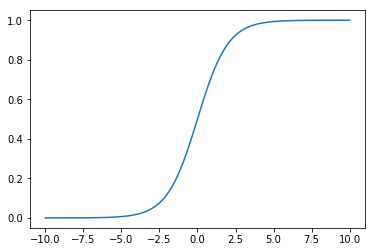

In [62]:
import matplotlib.pyplot as plt

plt.plot(z,y)
plt.show()

<hr>

## Trabajemos

Vectoricemos la función sigmoide definida anteriormente. Para ello puede revisar:

- numpy.vectorize
- numpy.exp

<hr>

# 4.1. Vectorización y Broadcasting

In [78]:
np.random.seed(2)
A = np.random.rand(10000000)
B = np.random.rand(10000000)

print A

[0.4359949  0.02592623 0.54966248 ... 0.92851865 0.66632148 0.12215498]


In [79]:
import time

In [80]:
tic = time.time()

suma = 0

for i in range(10000000):
    suma += A[i]*B[i]

toc = time.time()

print(suma)
print("Elapsed time: ", (toc-tic)*1000)

2501003.0002007955
('Elapsed time: ', 9536.498069763184)


In [81]:
tic = time.time()

suma = np.dot(A,B)
print(suma)

toc = time.time()

print("Elapsed time: ", (toc-tic)*1000)

2501003.0002009235
('Elapsed time: ', 17.355918884277344)


In [97]:
np.random.seed(2)

A = np.random.rand(4,3)
k = np.random.rand(4,1)

print(A)
print(k)
print(A+k)

[[0.4359949  0.02592623 0.54966248]
 [0.43532239 0.4203678  0.33033482]
 [0.20464863 0.61927097 0.29965467]
 [0.26682728 0.62113383 0.52914209]]
[[0.13457995]
 [0.51357812]
 [0.18443987]
 [0.78533515]]
[[0.57057485 0.16050618 0.68424242]
 [0.94890051 0.93394592 0.84391294]
 [0.3890885  0.80371083 0.48409454]
 [1.05216242 1.40646898 1.31447724]]


<hr>

# Trabajemos

Supongamos dos arreglos A y B de tamaño $m \times 2$, donde $m$ es un número de puntos y $2$ es la dimensión de los puntos, es decir, 2D para este ejemplo.

Vectorizar la distancia Euclídea entre cada punto 2D en A y su correspondiente punto 2D en B. El resultado debe ser un arreglo de dimensión $m$.

In [110]:
np.random.seed(2)

m = 100

A = np.random.rand(m, 4)
B = np.random.rand(m, 4)

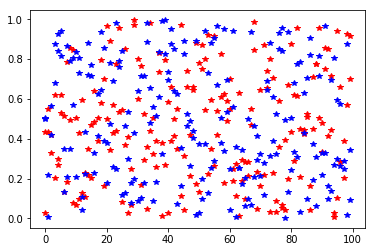

In [100]:
import matplotlib.pyplot as plt

plt.plot(A, 'r*')
plt.plot(B, 'b*')
plt.show()

In [111]:
np.sqrt(np.sum((A-B)**2, axis=1))

array([0.58183114, 0.65014207, 0.91133382, 0.67557112, 1.08997052,
       1.21343086, 1.16536852, 0.83124803, 0.65329862, 0.77163624,
       0.78751514, 0.38817249, 0.66463221, 0.68062536, 0.72956974,
       0.8375279 , 0.78106683, 0.95077998, 0.64407874, 0.79632858,
       0.77660859, 0.35085919, 0.84403629, 0.55410579, 0.70544455,
       0.7765965 , 0.51352558, 0.60731653, 0.64428623, 0.41366748,
       0.69596027, 1.10256593, 0.7236202 , 0.82710401, 1.15203082,
       0.67751511, 0.22950285, 0.48426237, 0.97116095, 0.56750996,
       0.8829261 , 0.73847001, 0.26062813, 0.78276049, 0.85135436,
       0.99863735, 0.76745901, 1.22517345, 0.75671281, 0.67871343,
       0.67907385, 0.87165135, 0.63028634, 1.14875574, 0.49532619,
       1.20534435, 0.68386168, 0.81451969, 0.61029765, 0.71611809,
       0.370141  , 0.97822608, 0.64800398, 0.73884719, 0.52080076,
       0.61667502, 0.69217331, 0.89739305, 0.70777541, 0.7984498 ,
       0.78429929, 0.38806551, 0.38115622, 0.46757527, 0.84979

In [105]:
A = np.random.rand(3, 2)
B = np.random.rand(3, 2)

print(A,B)

(array([[0.53284089, 0.80633521],
       [0.03427548, 0.15406612],
       [0.74818503, 0.3848699 ]]), array([[0.31789849, 0.57200881],
       [0.37242052, 0.90952991],
       [0.38697123, 0.8362492 ]]))


In [109]:
np.sqrt(np.sum((A-B)**2, axis=1))

array([0.31797657, 0.82768811, 0.5781165 ])

<hr>

# 5. IO en archivos

## Trabajemos

### Ejercicio 1
_"Plot exact and inexact Fahrenheit-Celsius conversion formulas. A simple rule to quickly compute the Celsius temperature from the Fahrenheit degrees is to subtract 30 and then divide by 2: . Compare this curve against the exact curve  in a plot. Let F vary between −20 and 120.”_  Fragmento de: Hans Petter Langtangen. “A Primer on Scientific Programming with Python”. Apple Books. 

Formula inexacta: $C = \frac{F-30}{2}$
<br>
Formula exacta: $C = (F-32)*\frac{5}{9}$

1. Utilizando nd-arrays, compute los resultados de las formulas anteriores.
2. Almacene los resultados tabulados en un archivo txt.
3. Utilice la libreria pickle para almacenar los arreglos en un archivo .pk
4. Grafique ambas curvas utilizando pyplot.plot(x,y, 'codigo de color')


### Ejercicio 2

“The file xy.dat contains two columns of numbers, corresponding to x and y coordinates on a curve. The start of the file looks as this:

Make a program that reads the first column into a list x and the second column into a list y. Plot the curve. Print out the mean y value as well as the maximum and minimum y values.
Hint.
Read the file line by line, split each line into words, convert to float, and append to x and y. The computations with y are simpler if the list is converted to an array.”

Fragmento de: Hans Petter Langtangen. “A Primer on Scientific Programming with Python”. Apple Books. 


### Ejercicio 3

“The formula for the trajectory of a ball is given by $f(x) = tan\theta - \frac{1}{2v_0^2}\frac{gx^2}{cos^2 \theta}+y_0$ where x is a coordinate along the ground, g is the acceleration of gravity, v 0 is the size of the initial velocity, which makes an angle θ with the x axis, and  is the initial position of the ball. In a program, first read the input data $y_0, \theta$, and $v_0$ and plot the trajectory $y = f(x)$ for $y >= 0$ ”

Fragmento de: Hans Petter Langtangen. “A Primer on Scientific Programming with Python”. Apple Books. 